In [0]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Import Dataset

In [0]:
df=pd.read_csv("adult.csv", na_values="?")

## **Introduction **

This is a dataset of USA which contains 32,561 observations distributed amongst 15 variables. The variables are :


*   Age :  The age of the individual
*   Workclass : The employer type (goverment, military, private, etc.)
*   fnlwgt : final weight on Current Population Survey (CPS)
*   Education : The highest level of education achieved for that individual
*   Education Num : Education in numerical form
*   Marital Status : Marriage status
*   Occupation : Job of the individual
*   Relationship : Family relations (son, wife, husband, etc.)
*   Race – The individuals' race (Black, White, Eskimo, etc.)
*   Sex : Gender
*   Capital_gain : Capital gains recorded
*   Capital_loss : Capital losses recorded
*   hr_per_week : working hours per week
*   Native Country : Country of origin for the individual
*   Income : Boolean Variable. Whether or not the person makes more than \$50,000 per annum income.



#*Inspecting Data*

In [43]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here, the info command tells us that in the 15 (variables) columns, there are 32,561 entries. The data types are either object (strings) or int64 (numeric).

## Handling Missing Values

It is evident that there are certain missing values in three columns viz. Workclass, Occupation, and Native Country.

In [0]:
#The missing value containing rows are dropped from the data for better results by the help of dropna command
df_1=df.dropna(how='any')

In [46]:
df_1.shape
#The processed dataset without any missing values

(30162, 15)

In [47]:
df_1[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income']].nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        118
capital.loss         90
hours.per.week       94
native.country       41
income                2
dtype: int64

In [48]:
df_1.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


No significant correlation can be found between the above columns.

#*1.Exploratory Analysis*

# 1.1 Income v/s Education

In [0]:
# Here, I have created a dictionary of educational qualifications (education) of an individual according to its numerical value (education.num)
edu_level = {}
for x,y in df_1[['education.num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

A cross table is taken consisting the variables education and income.

In [0]:
cross=pd.crosstab(df_1.education, df_1.income)

In [0]:
# Now proportion of the cohort population on education on basis of income is found upto 2 places of decimals 
i_e=round(cross.div(cross.apply(sum,1),0),2)

In [0]:
# I now sorted this according to educatioin_num assigned to the different levels of education.
i_e = i_e.reindex(sorted(edu_level, key=edu_level.get, reverse=True))

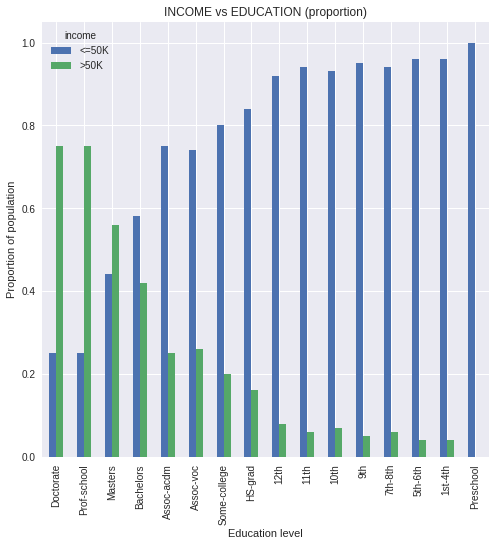

In [53]:
ax=i_e.plot(kind="bar", title="INCOME vs EDUCATION (proportion)", figsize=(8,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')
plt.show()

From the above graph we can conclude that people with education level only upto preschool are only those whose income is less than 50k. In other words, we can say most (almost 75%) of the people surveyed that have a doctorate, earn above 50k.

Although there is no conclusive proof (correlation) but we can say that most people with income higher than 50k tend to go for higher studies i.e. doctorate and others.

#1.2 Income v/s Gender

In [54]:
#The data is now filtered based on income and sex by count command in the groupby command.
Genderwise=df_1.groupby(['income','sex']).count()
Genderwise

age  workclass  fnlwgt  education  education.num  \
income sex                                                          
<=50K  Female   8670       8670    8670       8670           8670   
       Male    13984      13984   13984      13984          13984   
>50K   Female   1112       1112    1112       1112           1112   
       Male     6396       6396    6396       6396           6396   

               marital.status  occupation  relationship   race  capital.gain  \
income sex                                                                     
<=50K  Female            8670        8670          8670   8670          8670   
       Male             13984       13984         13984  13984         13984   
>50K   Female            1112        1112          1112   1112          1112   
       Male              6396        6396          6396   6396          6396   

               capital.loss  hours.per.week  native.country  
income sex                                                   
<=50K  Female          8670            8670            8670  
       Male           13984           13984           13984  
>50K   Female          1112            1112            1112  
       Male            6396            6396            6396

In [55]:
# A cross table is also created
cross_1=pd.crosstab(df_1.sex, df_1.income)
cross_1

income,<=50K,>50K
sex,,
Female,8670,1112
Male,13984,6396


###Bar Chart

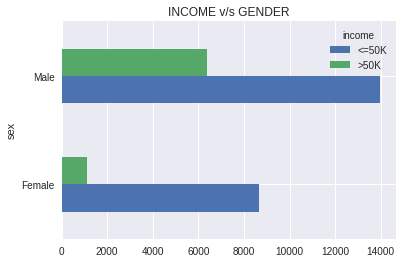

In [56]:
ax_1=cross_1.plot(kind="barh", title="INCOME v/s GENDER")

 The above horizontal bar diagram represents the actual numbers of people according to their income and gender

In [0]:
# Now proportion of the cohort population on gender is found out on basis of income (upto 2 places of decimals)
i_g=round(cross_1.div(cross_1.apply(sum,1),0),2)

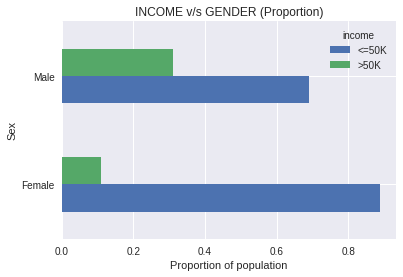

In [58]:
ax_1=i_g.plot(kind="barh", title="INCOME v/s GENDER (Proportion)")
ax_1.set_ylabel('Sex')
ax_1.set_xlabel('Proportion of population')
plt.show()

Clearly, more than 90% of females surveyed earn below or equal to 50k while in the males, this proportion is approximately 70-30.

### Pie Chart

In [59]:
Gender_Analysis=df_1.groupby("sex").count()
Gender_Analysis

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income
sex,,,,,,,,,,,,,,
Female,9782,9782,9782,9782,9782,9782,9782,9782,9782,9782,9782,9782,9782,9782
Male,20380,20380,20380,20380,20380,20380,20380,20380,20380,20380,20380,20380,20380,20380


In [60]:
Gender_Analysis["income"].tolist()

[9782, 20380]

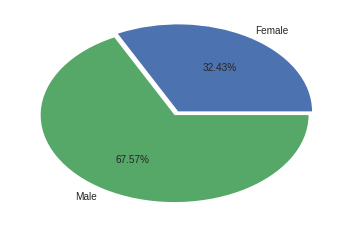

In [61]:
plt.pie(Gender_Analysis["income"].tolist(),labels=['Female','Male'], explode=(0.05,0), autopct='%1.2f%%')
plt.show()

Males capture around 67.57% of the cohort while the females grab the remaining 32.43%.

##1.2.1 Income Disparity (Genderwise)

In [62]:
# Here, I have taken into account how the genderwise distribution of income exists in the various workclasses
work=pd.crosstab(df_1.workclass, [df_1.income, df_1.sex])
work

income            <=50K          >50K      
sex              Female   Male Female  Male
workclass                                  
Federal-gov         254    324     55   310
Local-gov           672    786    152   457
Private            6921  10489    721  4155
Self-emp-inc         88    386     38   562
Self-emp-not-inc    312   1473     80   634
State-gov           418    517     66   278
Without-pay           5      9      0     0

In [0]:
# Now proportion of the cohort population on workclass is found out on basis of income and gender(upto 2 places of decimals)
gender_workclass = round((work).div(work.apply(sum,1),0),2)

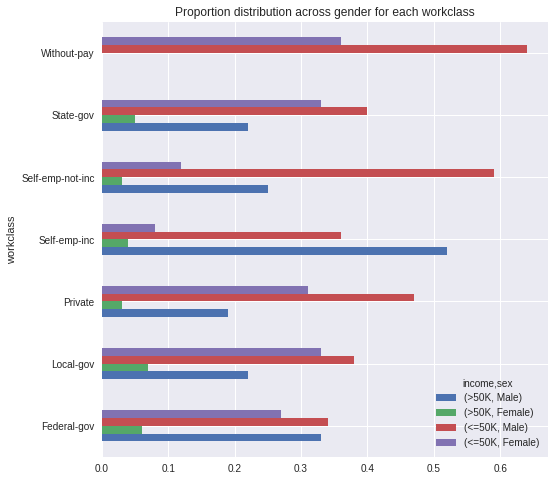

In [64]:
# All the genders alongwith their income segment is plotted against workclass
gender_workclass[[('>50K','Male'), ('>50K','Female'),('<=50K','Male'),('<=50K','Female')]].plot(kind = 'barh', title = 'Proportion distribution across gender for each workclass', figsize = (8,8))
plt.show()

####1.2.1.1 Income of Males

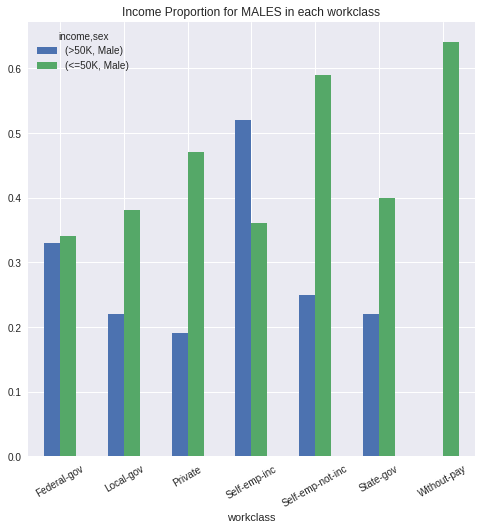

In [65]:
#The proportion of male gender alongwith their income segment are plotted against workclass
gender_workclass[[('>50K','Male'), ('<=50K','Male')]].plot(kind = 'bar', title = 'Income Proportion for MALES in each workclass', figsize = (8,8), rot = 30)
plt.show()

In the Self-emp-inc category, around 53% of the males earned more than 50k. In the Federal govt. category, an equal proportion of 33% earned both above as well as below 50k. In remaining categories majority of the males earned less than 50k.

####1.2.1.2 Income of Females

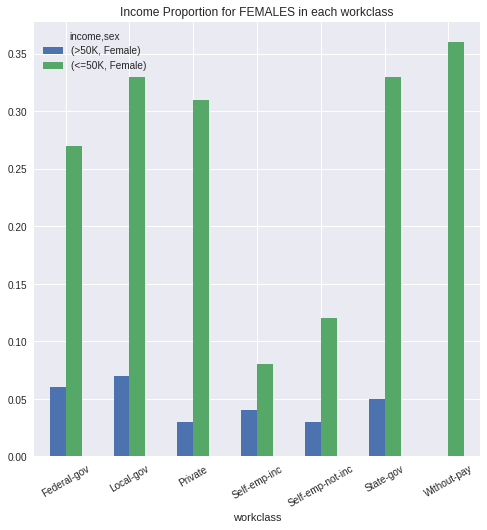

In [66]:
#The proportion of female gender alongwith their income segment are plotted against workclass
gender_workclass[[('>50K','Female'), ('<=50K','Female')]].plot(kind = 'bar', title = 'Income Proportion for FEMALES in each workclass', figsize = (8,8), rot = 30)
plt.show()

Since the total females earning more than 50k in the survey is quite less hence in all categories of workclasses majority females earned less than or equal to 50k.

####1.2.1.3 Income of above 50K

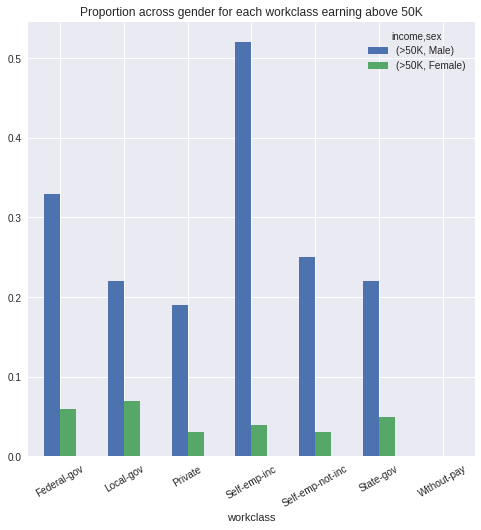

In [67]:
#The proportion of income segment of above 50K alongwith their gender segments are plotted against workclass
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion across gender for each workclass earning above 50K', figsize = (8,8), rot = 30)
plt.show()

From the bar graph above a huge disparity in income of men and women is evident amongst individuals earning above 50k.

####1.2.1.1 Income of below 50K

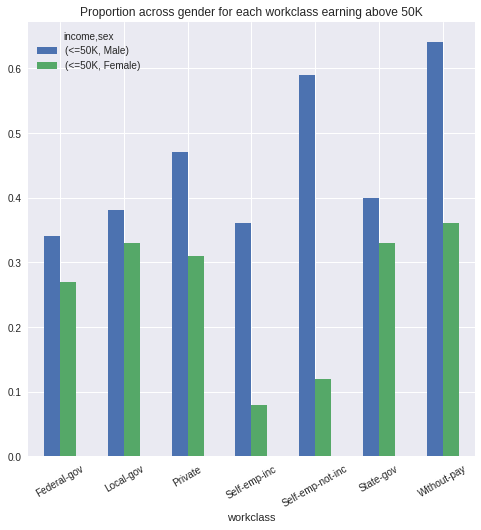

In [68]:
#The proportion of income segment of below 50K alongwith their gender segments are plotted against workclass
gender_workclass[[('<=50K','Male'), ('<=50K','Female')]].plot(kind = 'bar', title = 'Proportion across gender for each workclass earning above 50K', figsize = (8,8), rot = 30)
plt.show()

Amongst the people earning 50,000 and below, a normal pay disparity between the males and females is visible in all the workclasses.

#1.3 Income v/s Occupation

In [0]:
# Here, I have taken into account how the distribution of income exists in the various occupations
Occupation=pd.crosstab(df_1.occupation,df_1.income)
Occupation.sort_values(by="<=50K",inplace=True)
#The data is sorted in descending order based on income less than or equal to 50K

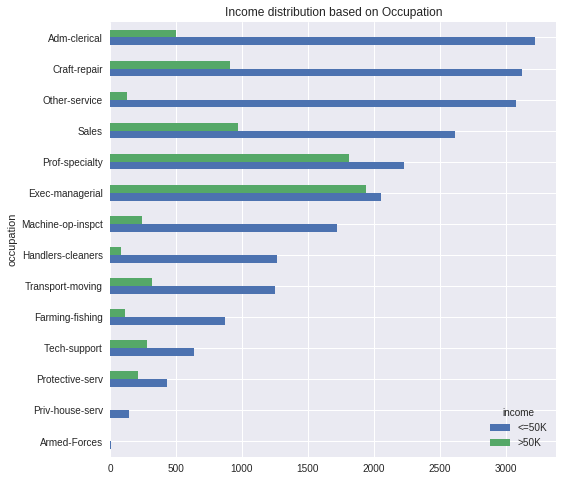

In [70]:
Occupation.plot(kind="barh",figsize=(8,8), title="Income distribution based on Occupation")
plt.show()

The above bar graph depicts the actual  number of individuals whose occupation based income distribution is given

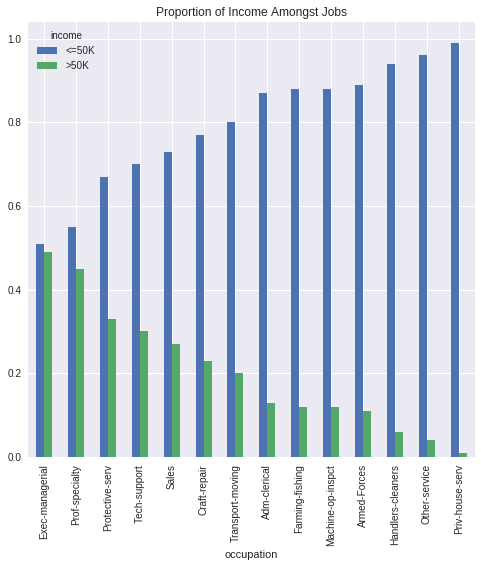

In [71]:
Jobwise=round(Occupation.div(Occupation.apply(sum,1),0),2)
Jobwise.sort_values(by="<=50K",inplace=True)
Jobwise.plot(kind="bar", figsize=(8,8),title="Proportion of Income Amongst Jobs")
plt.show()

We can infer from the above data that in Executive managerial occupation, an equal proportion of people can be found with income of above 50k as well as below 50k. Whereas, on the other hand, almost all people in the occupation of private house service earn below 50k.

#1.4 Income v/s Workclass

In [72]:
# The count of each workclass is found out
workclass=df_1.groupby("workclass").count()
workclass

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
workclass,,,,,,,,,,,,,,
Federal-gov,943,943,943,943,943,943,943,943,943,943,943,943,943,943
Local-gov,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
Private,22286,22286,22286,22286,22286,22286,22286,22286,22286,22286,22286,22286,22286,22286
Self-emp-inc,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074
Self-emp-not-inc,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499
State-gov,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
Without-pay,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [73]:
#The conut is converted to list format in order to plot into a pie chart
workclass["income"].tolist()

[943, 2067, 22286, 1074, 2499, 1279, 14]

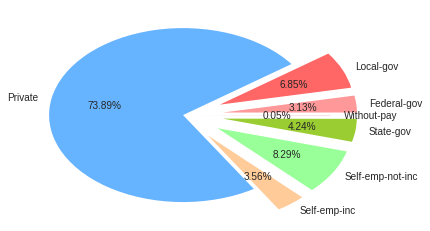

In [74]:
colors=['#ff9999', '#ff6666','#66b3ff', '#ffcc99', '#99ff99', 'yellowgreen','lightcoral']
plt.pie(workclass["income"].tolist(),labels= ['Federal-gov','Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],explode=(0.30,0.3,0,0.3,0.3,0.30,0.1), colors = colors, autopct='%1.2f%%')
plt.show()

Evidently, approximately 74% of the people surveyed are of the private workclass i.e., 74% people are working under private employers while just 0.05% work with no pay.

#1.5 Income v/s Race

In [75]:
# A cross table is drawn between race and income
race_analysis=pd.crosstab(df_1.race,df_1.income)
race_analysis

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,647,248
Black,2451,366
Other,210,21
White,19094,6839


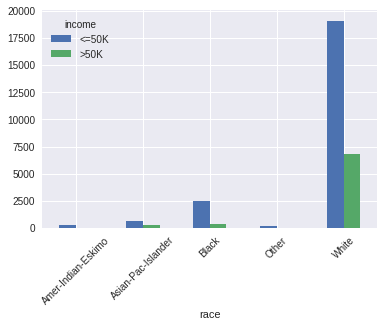

In [76]:
race_analysis.plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

In [77]:
race=df_1.groupby("race").count()
race["income"].tolist()

[286, 895, 2817, 231, 25933]

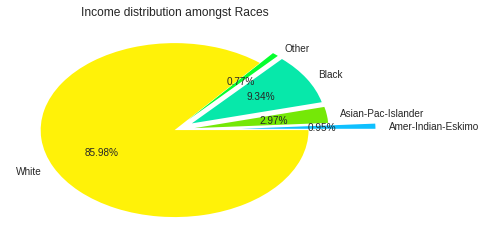

In [78]:
colors_1=['#0FC0FF', '#75E807','#07E8AA', '#05FF2E','#FFF208',]
labels=['Amer-Indian-Eskimo','Asian-Pac-Islander', 'Black', 'Other','White']
plt.pie(race["income"].tolist(),labels=labels,explode=(0.5,0.15,0.15,0.15,0),autopct='%1.2f%%', colors=colors_1, )
plt.title("Income distribution amongst Races")
plt.show()

Major of the income distribution is dominated by the race of Whites with 86% and next race is Blacks with 9.34%. The minimum proportion was captured by Other races (0.77%)

# 1.6 Income v/s Hours Per Week

In [79]:
df_1["hours.per.week"].unique()

array([18, 40, 45, 20, 35, 55, 76, 50, 42, 25, 32, 90, 60, 48, 70, 52, 72,
       39,  6, 65, 80, 67, 99, 30, 75, 12, 26, 10, 84, 38, 62, 44,  8, 28,
       59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 15,  1, 36, 47, 68, 54,
        2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 63, 53, 96, 66, 21,
        7, 13, 27, 14, 77, 31, 78, 11, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95])

In [0]:
# Here, I have categorized the data according to 3 ranges : below 40, between 40 & 60, and above 60. 
df_1["weekly_hours"]=['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in df_1['hours.per.week']]
df_1["weekly_hours"]

In [90]:
weekly_analysis=pd.crosstab(df_1.weekly_hours, df_1.income)
weekly_analysis

income,<=50K,>50K
weekly_hours,,
40-60,15937,6459
<40,6057,657
>60,660,392


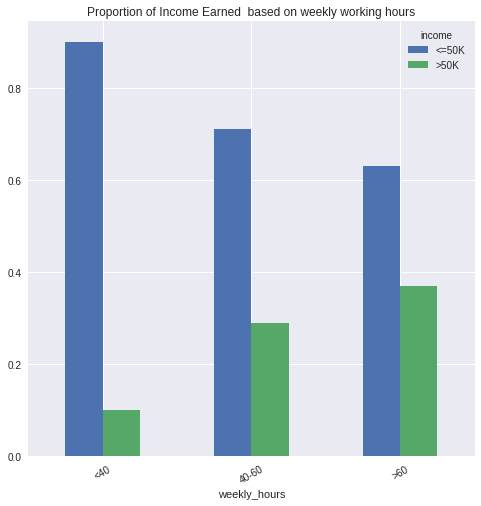

In [96]:
weekly_analysis_1=round(weekly_analysis.div(weekly_analysis.apply(sum,1),0),2)
weekly_analysis_1.sort_values(by = '>50K', inplace = True)
weekly_analysis_1.plot(kind="bar", title="Proportion of Income Earned  based on weekly working hours", figsize=(8,8),rot=30)

The graph depicts the logical assumption that higher the no. of working hours per week, higher would be the income earned i.e. here, maximum proportion of the individuals earning more than 50K lie in the range of working hours greater than 60.

# Income v/s  Capital Gains

In [105]:
df_1["capital.gain"].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1086,  1055,   991,   914,   594,   401,
         114])

In [0]:
# The capital gains were grouped into class range of 5k starting from below 5k to above 25k.
df_1["Cap_gain"]=['<5000' if i < 5000 else '5000-10000' if i < 10000 else '10000-15000' if i < 15000 else '15000-20000' if i < 20000 else '20000-25000' if i < 25000 else '>25000' for i in df_1['capital.gain']]
df_1["Cap_gain"]

In [112]:
Gain_analysis=pd.crosstab(df_1.Cap_gain, df_1.income)
Gain_analysis

income,<=50K,>50K
Cap_gain,,
10000-15000,6,144
15000-20000,0,350
20000-25000,1,33
5000-10000,135,699
<5000,22507,6089
>25000,5,193


In [114]:
Gains=round(Gain_analysis.div(Gain_analysis.apply(sum,1),0),2)
Gains.sort_values(by = '>50K', inplace = True)
Gains

income,<=50K,>50K
Cap_gain,,
<5000,0.79,0.21
5000-10000,0.16,0.84
10000-15000,0.04,0.96
20000-25000,0.03,0.97
>25000,0.03,0.97
15000-20000,0.00,1.00


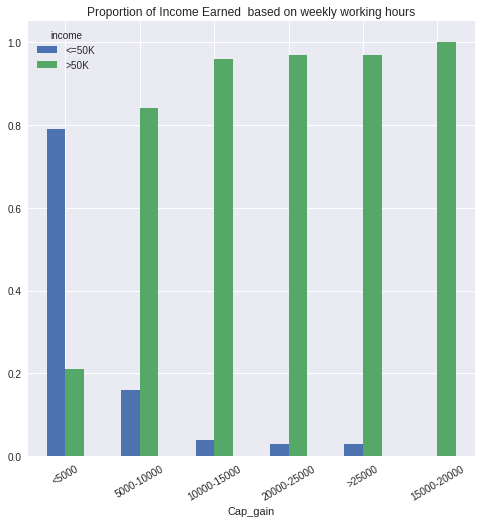

In [115]:
Gains.plot(kind="bar", title="Proportion of Income Earned  based on weekly working hours", figsize=(8,8),rot=30)

As is conclusive from the above graph, capital gains of range 15k-20k were recorded only by individuals earning more than 50k. Interestingly, 3% of capital gains greater than 25k were recorded by those individuals who earned less than 50k.

Moreover, individuals with earning less than or equal to 50k  dominated (79%)  the range of less than 5k capital gains.

# Conclusions



1.   75% of the individuals surveyed that have a doctorate, earn above 50k.
2.   For the male individuals in the cohort; in the Federal govt. category, an equal proportion of 33% earned both above as well as below 50k.
3.   In all categories of workclasses majority female individuals earned less than or equal to 50k.
4.   In Executive Managerial occupation, an equal proportion of individuals can be found with income of above 50k as well as below 50k.
5.   73.89% people are working under private employers whereas a meagre 0.05% work with no pay.
6.   Major of the income distribution is dominated by the race of Whites with 85.98% and next race is Blacks with 9.34%. The minimum proportion was captured by Other races (0.77%)
7.   Maximum proportion of the individuals earning more than 50k lie in the range of working hours greater than 60.
8.   Of the Capital gains of range 20k or above, 97% were recorded by individuals with earning greater than 50k.
